references:<br>
https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb


classifying animated works of certain superheroes<br>
creating a custom dataset<br>
classes chosen:
  - spiderman
  - wolverine
  - deadpool
  - batman


# creating the dataset 

In [0]:
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datapath = "/content/drive/My Drive/fast.ai v3/datasets/superheroes"


Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```


In [0]:
data_path = Path(datapath) #creating path obect for exploiting functionality

In [6]:
data_path.ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes/spiderman'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes/deadpool'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes/batman'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes/wolverine')]

In [9]:
data_path

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes')

In [0]:
folder = ['spiderman','deadpool','batman','wolverine']
file = ['spiderman.csv','deadpool.csv','batman.csv','wolverine.csv']

In [0]:
d_pairs = list(zip(folder,file))

In [9]:
d_pairs

[('spiderman', 'spiderman.csv'),
 ('deadpool', 'deadpool.csv'),
 ('batman', 'batman.csv'),
 ('wolverine', 'wolverine.csv')]

## creating folders

In [0]:
for x in d_pairs:
    folder = x[0]
    dest = data_path/folder
    dest.mkdir(parents=True,exist_ok=True)

## uploading the corresponding files in the corresponding folders (urls)

downloading images now

In [0]:
    folder = d_pairs[3][0]
    file = d_pairs[3][1]
    dest = data_path/folder
    dest.mkdir(parents=True,exist_ok=True)
    download_images(dest/file,dest,max_pics=200)

looped initially but some error was raised,
will look into it later, for now: changed the first index of d_pics

removing any images that can't be opened

In [0]:
classes = [d_pairs[i][0] for i in range(len(d_pairs))]

In [19]:
classes

['spiderman', 'deadpool', 'batman', 'wolverine']

In [0]:
for c in classes:
    print(c)
    verify_images(data_path/c,delete=True,max_size=500)

# Viewing data

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(data_path,train=".",valid_pct=0.2,
                                  ds_tfms = get_transforms(),
                                  size=224,
                                  num_workers=4).normalize(imagenet_stats) 
# creating a validation set (20% of training)

In [26]:
data.classes

['batman', 'deadpool', 'spiderman', 'wolverine']

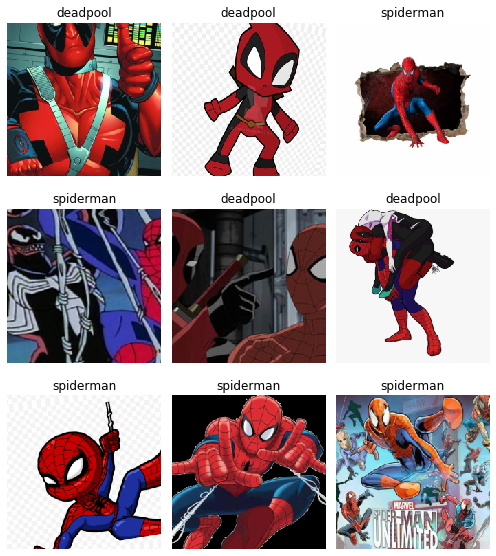

In [27]:
data.show_batch(rows=3,figsize=(7,8))

In [28]:
data.classes,len(data.train_ds),len(data.valid_ds)

(['batman', 'deadpool', 'spiderman', 'wolverine'], 450, 112)

# Training the model

In [29]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 67.6MB/s]


In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.894087,0.744447,0.285714,00:11
1,1.290070,0.668930,0.169643,00:10
2,0.953889,0.617073,0.133929,00:10
3,0.800825,0.592808,0.151786,00:10


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


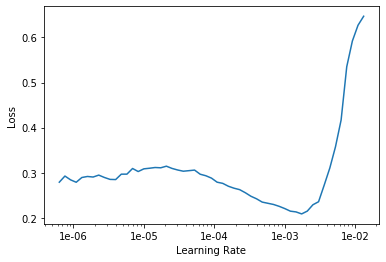

In [34]:
learn.recorder.plot()

In [0]:
# using an lr range of 4e-5 to 2e-3 ( where the first strong negative slope is observed)
# lr explodes after 1e-3

In [36]:
learn.fit_one_cycle(2,max_lr = slice(4e-5,2e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.373737,0.714353,0.151786,00:11
1,0.330258,0.735898,0.187500,00:11


In [0]:
learn.save('stage-2')

In [38]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (450 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
spiderman,spiderman,spiderman,spiderman,spiderman
Path: /content/drive/My Drive/fast.ai v3/datasets/superheroes;

Valid: LabelList (112 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
deadpool,spiderman,batman,spiderman,deadpool
Path: /content/drive/My Drive/fast.ai v3/datasets/superheroes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3),

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

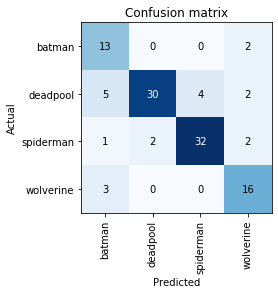

In [40]:
interp.plot_confusion_matrix()

# Cleaning up some images
### which may not be consistent with the labels 

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(data_path).
      split_none()
      .label_from_folder()
      .transform(get_transforms(),size=224)
      .databunch())

creating new learner to use the newly created databunch

In [0]:
learn_cln = cnn_learner(db,models.resnet34,metrics=error_rate)

learn_cln.load('stage-2');